In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
pd.options.display.mpl_style = 'default'

In [3]:
figsize(16, 5)

In [4]:
import glob

In [5]:
def read_csv(csv, colname):
    df = pd.read_csv(csv, sep='\t', skipinitialspace=True, header=None)
    df.columns = ['frame', colname]
    df = df.set_index('frame')
    return df

def update_df(df, csv, colname):
    _df = read_csv(csv, colname)
    if df is None:
        df = _df
    else:
        df = df.join(_df)
    return df

def populate_df(prefix):
    """Read data from all prefix*.csv files into a pandas dataframe.
    
    Each column of the dataframe is the name of the csv file.
    """
    files = glob.glob('%s_*.csv' % prefix)
    df = None
    for csvfile in files:
        colname = csvfile[len(prefix)+1:][:-4]
        df = update_df(df, csvfile, colname)
    return df

In [58]:
p1_df = populate_df('p1_s10')
p1_ex_df = populate_df('p1_extended_s10')

In [6]:
up1_df = populate_df('up1_s10')
up1_ex_df = populate_df('up1_extended_s10')

In [130]:
up1_ex_df.head(10)

,bond1,bond2,bond3,phi35,phi40,psi36,psi41
frame,,,,,,,
0,14.549412,14.632073,33.532547,-166.408524,174.238052,169.369095,154.332779
1,14.468503,14.632763,33.587532,-161.899811,-179.868820,167.278275,150.394196
2,14.281557,14.441155,33.499123,-154.225403,-157.638092,165.545258,150.180756
3,14.413851,14.323899,32.951199,-152.897491,-147.480316,162.220322,145.384491
4,14.694866,14.140464,31.805300,-154.913437,-146.196365,164.763626,144.886353
5,15.099973,14.005488,31.905352,-155.214294,-146.879379,160.359756,151.860947
6,15.380791,13.938671,31.988667,-148.916199,-149.292099,160.714828,153.643280
7,15.305537,13.893762,31.962698,-147.539108,-147.836792,159.422272,156.115280
8,15.294457,13.882197,32.142002,-148.411148,-147.224258,157.656281,154.435226


In [132]:
up1_df.tail(1)

,bond1,bond2,bond3,phi35,phi40,psi36,psi41
frame,,,,,,,
100010,3.866852,5.118856,7.814375,-111.990738,-101.1791,147.199112,117.003296


In [134]:
10001000/1e6

10.001

In [141]:
up1_df.index[-1]

100.0

In [7]:
%matplotlib notebook

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
figsize(16, 5)

In [10]:
import numpy as np

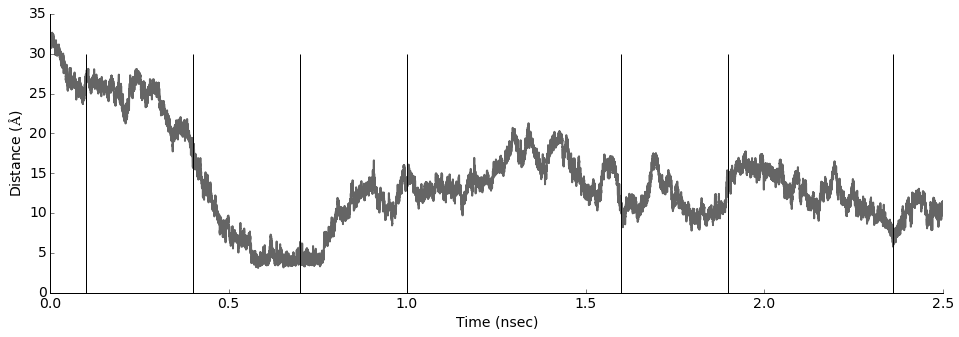

In [84]:
## This plot is used to draw lines at the points (frames) where we took screen shot.
## The screenshots are added to this plot using an image editor.

# # Remove the plot frame lines. They are unnecessary chartjunk.  
ax = subplot(111)  
ax.spines["top"].set_visible(False)  
# ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
# ax.spines["left"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

colors = ['black', 'blue']

# ax = up1_ex_df.bond3.plot(color='k', lw=3, alpha=.8, fontsize=14)
plot(up1_ex_df.index/1e4, up1_ex_df.bond3, color=colors[0], alpha=0.6, lw=2, label='unphosphorylated extended')
# plot(up1_df.index/1e4, up1_df.bond3, color=colors[1], alpha=0.6, lw=2, label='unphosphorylated structured')
xlim([0, 2.5])
xticks(fontsize=14)  
yticks(fontsize=14)  
ylabel(r'Distance ($\AA$)', fontsize=14)
xlabel('Time (nsec)', fontsize=14)
# legend()

frames = [1000, 4000, 7000, 10000, 16000, 19000, 23600]

ymin, ymax = ylim()

for vl in np.array(frames)/1e4:
    vlines(vl, ymin, 30)


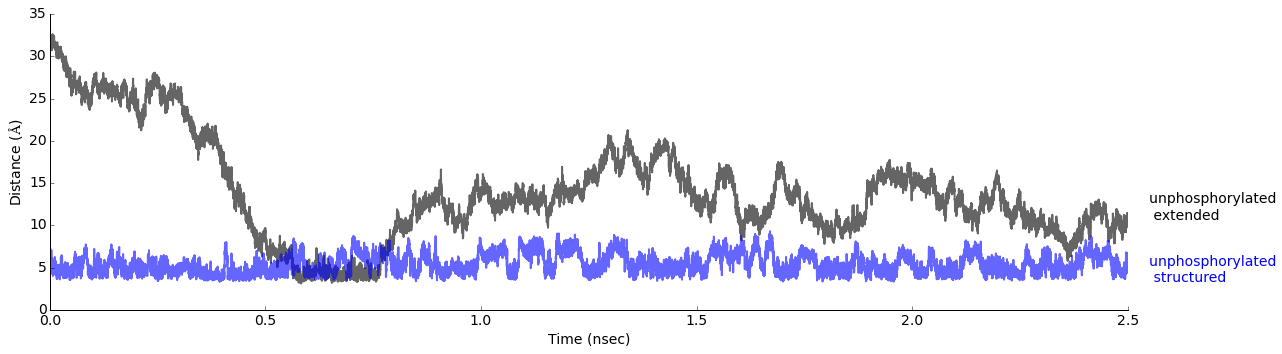

In [79]:
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = subplot(111)  
ax.spines["top"].set_visible(False)  
# ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
# ax.spines["left"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

colors = ['black', 'blue']

# ax = up1_ex_df.bond3.plot(color='k', lw=3, alpha=.8, fontsize=14)
plot(up1_ex_df.index/1e4, up1_ex_df.bond3, color=colors[0], alpha=0.6, lw=2, label='unphosphorylated extended')
plot(up1_df.index/1e4, up1_df.bond3, color=colors[1], alpha=0.6, lw=2, label='unphosphorylated structured')
xlim([0, 2.5])
xticks(fontsize=14)  
yticks(fontsize=14)  
ylabel(r'Distance ($\AA$)', fontsize=14)
xlabel('Time (nsec)', fontsize=14)
# legend()

# frames = [150, 1000, 4000, 7000, 10000, 13000, 16000, 19000, 23600]

# ymin, ymax = ylim()

# for vl in np.array(frames)/1e4:
#     vlines(vl, ymin, 30)

text(2.55, up1_ex_df.bond3[-200:].mean(), 'unphosphorylated \n extended', fontsize=14, color=colors[0])  
text(2.55, up1_df.bond3[-200:].min(), 'unphosphorylated \n structured', fontsize=14, color=colors[1])  

tight_layout()

savefig('unphosphorylated_bond3.png', format='png')

In [74]:
savefig?

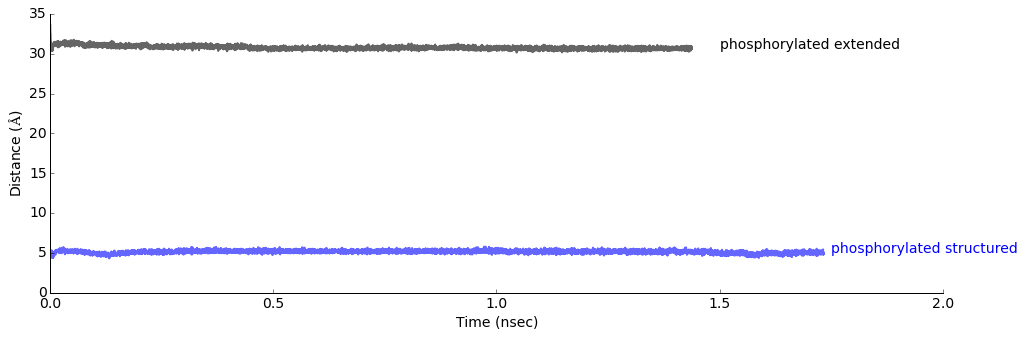

In [65]:
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = subplot(111)  
ax.spines["top"].set_visible(False)  
# ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
# ax.spines["left"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

colors = ['black', 'blue']

# ax = up1_ex_df.bond3.plot(color='k', lw=3, alpha=.8, fontsize=14)
plot(p1_ex_df.index/1e4, p1_ex_df.bond3, color=colors[0], alpha=0.6, lw=2)
plot(p1_df.index/1e4, p1_df.bond3, color=colors[1], alpha=0.6, lw=2)
xlim([0, 2])
xticks(fontsize=14)  
yticks(fontsize=14)  
ylabel(r'Distance ($\AA$)', fontsize=14)
xlabel('Time (nsec)', fontsize=14)
# legend()

# frames = [150, 1000, 4000, 7000, 10000, 13000, 16000, 19000, 23600]

# ymin, ymax = ylim()

# for vl in np.array(frames)/1e4:
#     vlines(vl, ymin, 30)

text(1.5, p1_ex_df.bond3[-200:].mean(), 'phosphorylated extended', fontsize=14, color=colors[0])  
text(1.75, p1_df.bond3[-200:].mean(), 'phosphorylated structured', fontsize=14, color=colors[1])  

savefig('phosphorylated_bond3.png')